# Day 1

In [424]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import timeit


In [2]:
df = pd.read_csv('inputs/day1.txt', header=None)
x = df.iloc[:,0]

In [3]:
df.head()

0
0  193
1  195
2  204
3  208
4  219

In [4]:
df.shift(1).bfill().head()

0
0  193.0
1  193.0
2  195.0
3  204.0
4  208.0

In [5]:
(df.head() > df.shift(1).bfill().head()).astype(int).sum()

0    4
dtype: int64

## Part one

In [6]:
((x - x.shift(1).bfill()).values.flatten() > 0).sum() 

1832

## Part two

In [7]:
wx = x.rolling(window=3).sum().dropna()
((wx - wx.shift(1).bfill()).values.flatten() > 0).sum() 

1858

# Day 2

In [8]:
df = pd.read_csv('inputs/day2.txt', header=None, delimiter=' ')
df.columns = ['direction', 'val']
df.direction.unique()

array(['forward', 'down', 'up'], dtype=object)

## Part one

In [9]:
forward = df[df.direction == 'forward'].val.sum()
down = df[df.direction == 'down'].val.sum()
up = df[df.direction == 'up'].val.sum()
forward * (down-up)

1936494

## Part two

In [10]:
hori, aim, depth = 0, 0, 0
for cmd, val in df.values:
    if cmd == 'down':
        aim += val
    if cmd == 'up':
        aim -= val
    if cmd == 'forward':
        hori += val
        depth += aim*val
hori*depth

1997106066

# Day 3

In [11]:
# Load
df = pd.read_csv('inputs/day3.txt', header=None, names=['raw'], dtype={'raw': str})
#n_bits = df.raw
n_bits = df.raw.str.len().unique()[0]
print(f'n_bits = {n_bits}')
df.head()

n_bits = 12


raw
0  111100101100
1  101100110001
2  100110100101
3  001101100010
4  010111011110

## Part one

In [12]:
gamma_str = "".join([
    str(int(df.raw.str.slice(start=i, stop=i+1).astype(int).sum() > len(df) / 2))
    for i in range(n_bits)
])
gamma = int(gamma_str, 2)
epsilon_str = "".join(['1' if s == '0' else '0' for s in gamma_str])
epsilon = int(epsilon_str, 2)
print(f'{gamma_str} => {gamma}')
print(f'{epsilon_str} => {epsilon}')
print(f'result = {gamma} * {epsilon} = {gamma * epsilon}')

000011011010 => 218
111100100101 => 3877
result = 218 * 3877 = 845186


## Part two

In [13]:
oxy = df.copy()
i = 0
while len(oxy) > 1:
    most_common = str(int(oxy.raw.str.slice(start=i, stop=i+1).astype(int).sum() >= len(oxy) / 2))
    oxy = oxy[oxy.raw.str.slice(start=i, stop=i+1) == most_common]
    i = (i + 1) % n_bits
oxy_rating_str = oxy.raw.values[0]
oxy_rating = int(oxy_rating_str, 2)

co2 = df.copy()
i = 0
while len(co2) > 1:
    most_common = str(int(co2.raw.str.slice(start=i, stop=i+1).astype(int).sum() < len(co2) / 2))
    co2 = co2[co2.raw.str.slice(start=i, stop=i+1) == most_common]
    i = (i + 1) % n_bits
co2_rating_str = co2.raw.values[0]
co2_rating = int(co2_rating_str, 2)

print(f'{oxy_rating_str} => {oxy_rating}')
print(f'{co2_rating_str} => {co2_rating}')
print(f'life support rating = {oxy_rating} * {co2_rating} = {oxy_rating * co2_rating}')

010110110011 => 1459
110001101010 => 3178
life support rating = 1459 * 3178 = 4636702


# Day 4

In [14]:
# Load data
with open('inputs/day4.txt') as fi:
    lines = fi.readlines()
len(lines)

def get_boards(lines):
    rows = []
    for line in lines:
        line = line.strip()
        if not line: continue
        rows.append([int(s) for s in line.split()])
        if len(rows) == 5:
            yield np.array(rows)
            rows = []

all_draws = [int(s) for s in lines[0].strip().split(',')]
boards = list(get_boards(lines[1:]))

print(all_draws)
print(boards[0])
print(boards[0].T)

[26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94, 45, 56, 0, 6, 67, 24, 97, 50, 92, 93, 84, 65, 71, 90, 96, 21, 87, 75, 58, 82, 14, 53, 95, 27, 49, 69, 16, 89, 37, 13, 1, 81, 60, 79, 51, 18, 48, 33, 42, 63, 39, 34, 62, 55, 47, 54, 23, 83, 77, 9, 70, 68, 85, 86, 91, 41, 4, 61, 78, 31, 22, 76, 40, 17, 30, 98, 44, 25, 80, 73, 11, 28, 7, 99, 29, 57, 43, 10]
[[57 12 60 96 93]
 [73 87 63 70 91]
 [74 32 43 67 46]
 [59 34  5 35 82]
 [53 40 55 29  1]]
[[57 73 74 59 53]
 [12 87 32 34 40]
 [60 63 43  5 55]
 [96 70 67 35 29]
 [93 91 46 82  1]]


## Part one

In [15]:
def check_full(row, draws):
    measure = set(row).difference(draws)
    return len(measure) == 0
    

def find_board(boards, all_draws):
    for round_i in range(len(all_draws)):
        draw = all_draws[round_i]
        draws = all_draws[:round_i+1]
        for board_i, board in enumerate(boards):
            for row in np.vstack([board, board.T]):
                if check_full(row, draws):
                    return draw, draws, board, board_i, row


draw, draws, board, board_i, row = find_board(boards, all_draws)
unmarked = list(set(board.flatten()).difference(draws))
print(f'Board = {board_i}')
print(board)
print(f'Draws = [{draw}], {draws}')
print(f'Unmarked = {unmarked}')


score = np.array(unmarked).sum() * draw
print(f'Score = {score}')

Board = 43
[[ 8 32 94 72 74]
 [27 29 22  2 76]
 [58 54 80  5 35]
 [36 24 83 59 25]
 [21 31 48 39  4]]
Draws = [94], [26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94]
Unmarked = [4, 76, 80, 83, 21, 22, 24, 25, 27, 29, 31, 39, 48, 54, 58]
Score = 58374


## Part two

In [16]:
def check_full(row, draws):
    measure = set(row).difference(draws)
    return len(measure) == 0
    

def find_board(boards, all_draws):
    remain = np.ones(len(boards))
    for round_i in range(len(all_draws)):
        draw = all_draws[round_i]
        draws = all_draws[:round_i+1]
        for board_i, board in enumerate(boards):
            for row in np.vstack([board, board.T]):
                if check_full(row, draws):
                    remain[board_i] = 0
            if remain.sum() == 0:
                return draw, draws, board, board_i, row

draw, draws, board, board_i, row = find_board(boards, all_draws)
unmarked = list(set(board.flatten()).difference(draws))
print(f'Board = {board_i}')
print(board)
print(f'Winning row = {row}')
print(f'Draws = [{draw}], {draws}')
print(f'Unmarked = {unmarked}')


score = np.array(unmarked).sum() * draw
print(f'Score = {score}')

Board = 16
[[41 99 93 62 96]
 [90 30 10  5 94]
 [98 32 83 78 25]
 [76 27 29 19 35]
 [58 91 34 31  3]]
Winning row = [96 94 25 35  3]
Draws = [31], [26, 38, 2, 15, 36, 8, 12, 46, 88, 72, 32, 35, 64, 19, 5, 66, 20, 52, 74, 3, 59, 94, 45, 56, 0, 6, 67, 24, 97, 50, 92, 93, 84, 65, 71, 90, 96, 21, 87, 75, 58, 82, 14, 53, 95, 27, 49, 69, 16, 89, 37, 13, 1, 81, 60, 79, 51, 18, 48, 33, 42, 63, 39, 34, 62, 55, 47, 54, 23, 83, 77, 9, 70, 68, 85, 86, 91, 41, 4, 61, 78, 31]
Unmarked = [98, 99, 10, 76, 25, 29, 30]
Score = 11377


## Day 5

In [216]:
with open('inputs/day5.txt') as fi:
    lines = np.array([
        [int(s) for s in re.match(r'^(\d+),(\d+) -> (\d+),(\d+)$', line).groups()]
         for line in fi.readlines()])

## Analysis

In [217]:
lines.min(), lines.max()

(10, 990)

## Part one

In [218]:
def interpolate(x1, y1, x2, y2):
    if x1 == x2:
        # vertical case
        n_steps = abs(y1-y2) + 1
        return [(x1, y) for y in np.linspace(y1, y2, n_steps).astype(int)]
    elif y1 == y2:
        # horizontal case
        n_steps = abs(x1-x2) + 1
        return [(x, y1) for x in np.linspace(x1, x2, n_steps).astype(int)]
    else:
        # slanted case
        n_steps = min(abs(x1 - x2)+1, abs(y1-y2)+1)
        return list(zip(
            np.linspace(x1,x2, n_steps),#.astype(int),
            np.linspace(y1,y2, n_steps)#.astype(int)
        ))
    
    
def intersections(lines):
    dim = lines.max()+1
    grid = np.zeros((dim,dim))
    for line in lines:
        for x,y in interpolate(*line):
            #print(x,y)
            assert x == int(x) and y == int(y)
            grid[int(x)][int(y)] += 1
    return grid.astype(int)

[[491 392  34 392]
 [337  52 485  52]
 [256 605 256 959]
 [399 193 598 193]
 [ 79 450 569 450]] ...
Result = 6856


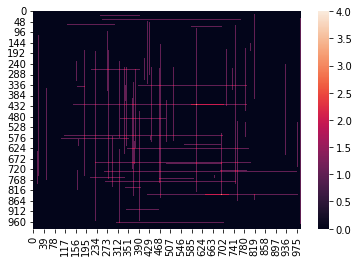

In [219]:
test_lines = lines[(lines[:,0] == lines[:,2]) | (lines[:,1] == lines[:,3])]
print(test_lines[:5], '...')
grid = intersections(test_lines)
sns.heatmap(grid.T)

print(f'Result = {len(grid[grid > 1].flatten())}')
# Result = 6822 wrong

## Part two

Result = 20666


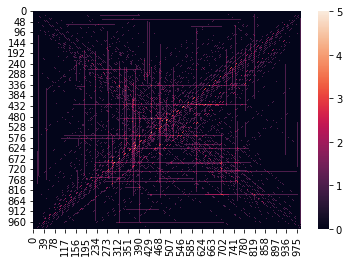

In [222]:
test_lines = lines
grid = intersections(test_lines)
sns.heatmap(grid.T)

print(f'Result = {len(grid[grid > 1].flatten())}')

## Day 6

In [469]:
with open('inputs/day6.txt') as fi:
    fish = np.array([int(s) for s in fi.read().strip().split(',')])
print(np.unique(fish))
fish

[1 2 3 4 5]


array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 4, 1, 5, 1, 3,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 5, 2, 5, 1, 1, 2, 1, 1, 1, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 4, 1,
       1, 1, 1, 1, 5, 1, 2, 4, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 4, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 2, 5, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 3, 1, 3, 1, 4, 1, 5, 4, 1, 1, 2, 1, 1, 5,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 5, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 4, 1, 5, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       5, 1, 2, 1, 1, 2, 4, 1, 1, 2, 1, 5, 5, 3])

## Part one

In [470]:
def sim_naive(pop, days=1):
    # will use a lot of memory if days is large!
    pop = np.array(pop)  # copy initial population
    for i in range(days):
        #if i % 10 == 0: print(f'Day {i}')
        n_reset = len(pop[pop == 0])
        pop = np.concatenate([
            pop[pop == 0] + 6,  # reset fish
            pop[pop > 0] - 1,  # decremented fish
            pop[pop == 0] + 8, # new fish
        ])
    return len(pop)

In [473]:
result = sim_naive(fish, days=80)
print(f'Result = {result}')

Result = 395627


## Part two

In [474]:
def fast_sim(pop, days=10):
    counters = np.zeros(9).astype(int)
    for t in pop: counters[t] += 1
    for _ in range(days):
        n_spawns = counters[0]
        counters = np.roll(counters, -1)
        counters[8] = n_spawns
        counters[6] += n_spawns
    return sum(counters)
    
print(f'Result = {fast_sim(fish, days=256)}')

Result = 1767323539209


# Day 7

In [503]:
with open('inputs/day7.txt') as fi:
    pos = np.array([int(s) for s in fi.read().strip().split(',')])
print(len(pos))

1000


## Part one

In [514]:
n_targets = range(len(pos))
fuel_costs = [np.abs(pos - target).sum() for target in n_targets]
sns.lineplot(x=targets, y=fuel_costs)
print(f'Mean crab position = {pos.mean()}')
opt_target = np.argmin(fuel_costs)
print(f'Optimal crab position: {opt_target}')
print(f'Optimal fuel cost: {fuel_costs[opt_target]}')

Mean crab position = 460.574
Optimal crab position: 342
Optimal fuel cost: 325528


## Part two

Mean crab position = 460.574
Optimal crab position: 460
Optimal fuel cost: 85015836


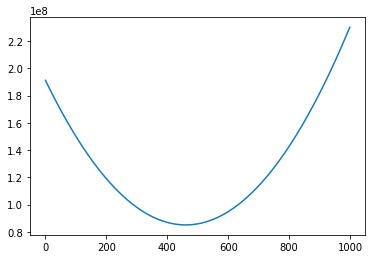

In [526]:
def cost(pos, target):
    dist = np.abs(pos - target)
    return dist*(dist+1)/2

vcost = np.vectorize(cost)

fuel_costs = [vcost(pos, target).sum() for target in n_targets]
sns.lineplot(x=targets, y=fuel_costs)
print(f'Mean crab position = {pos.mean()}')
opt_target = np.argmin(fuel_costs)
print(f'Optimal crab position: {opt_target}')
print(f'Optimal fuel cost: {fuel_costs[opt_target].astype(int)}')